## Image Enhancement

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import cv2
import numpy.matlib
import random
from PIL import Image, ImageFilter

# Q1. Local Color Correction

## 1. a. Monochrome images

In [2]:
def LCC_mono(image, max_value=1.):
    
    if max_value == 1:
        img = np.mean(image, 2)
        sigma = 2
        img_fft = np.fft.fft2(img)
        
        y, x = img.shape
        Nr = np.fft.ifftshift(np.arange(np.fix(-y/2.), np.ceil(y/2), 1))
        Nc = np.fft.ifftshift(np.arange(np.fix(-x/2), np.ceil(x/2), 1))
        Nc, Nr  = np.meshgrid(Nc, Nr)
        dft_gauss_kernel = np.exp(-2* sigma**2 * np.pi**2 * ((Nr/y)**2 + (Nc/x)**2))
        
        conv_fft = img_fft * np.matlib.repmat(dft_gauss_kernel, 1,1)
        M = np.real(np.fft.ifft2(conv_fft))
        
        output = img**(2**(2*M - 1))
        
    else: 
        img = np.mean(image, 2)
        sigma = 2
        inv = 255 - img
        img_fft = np.fft.fft2(inv)
        
        y, x = img.shape
        Nr = np.fft.ifftshift(np.arange(np.fix(-y/2.), np.ceil(y/2), 1))
        Nc = np.fft.ifftshift(np.arange(np.fix(-x/2), np.ceil(x/2), 1))
        Nc, Nr  = np.meshgrid(Nc, Nr)
        dft_gauss_kernel = np.exp(-2 * sigma**2 * np.pi**2 * ((Nr/y)**2 + (Nc/x)**2))
        
        conv_fft = img_fft * np.matlib.repmat(dft_gauss_kernel, 1,1)
        M = np.real(np.fft.ifft2(conv_fft))
        
        output = np.int_(255. * (img/255.)**(2**((128. - M)/128)))
        
    return (output)

### (i) Un-normalised images

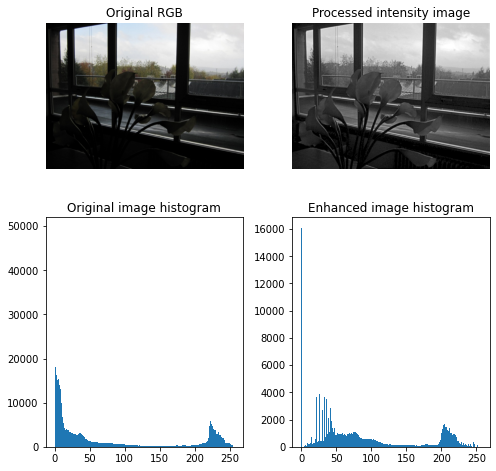

In [3]:
img = cv2.imread('input1.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
max_level = 255. if np.max(img_rgb)>1. else 1.
img_sat = LCC_mono(img_rgb, max_level)

f, ax = plt.subplots(2, 2, figsize= (7, 7), tight_layout = True)
ax[0,0].imshow(img_rgb)
ax[0,0].set_title('Original RGB')
ax[0,0].axis('off')
ax[0,1].imshow(img_sat, cmap = 'gray')
ax[0,1].set_title('Processed intensity image')
ax[0,1].axis('off')
ax[1,0].hist(img_rgb.ravel(), 256 , [0,256])
ax[1,0].set_title('Original image histogram')
ax[1,1].hist(img_sat.ravel(), 256 , [0,256])
ax[1,1].set_title('Enhanced image histogram')
plt.show()

### Normalised images

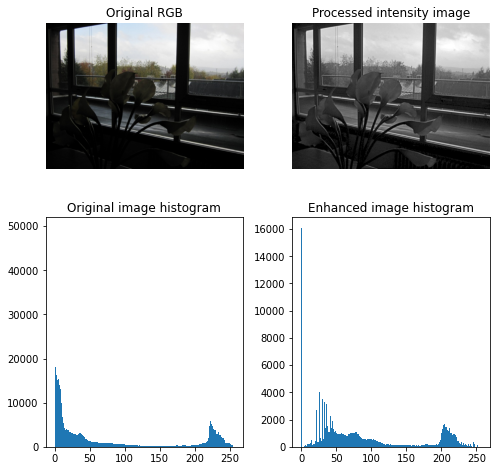

In [4]:
img = cv2.imread('input1.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.
max_level = 255. if np.max(img_rgb)>1. else 1.
img_sat = LCC_mono(img_rgb, max_level)

f, ax = plt.subplots(2, 2, figsize= (7, 7), tight_layout = True)
ax[0,0].imshow(img_rgb)
ax[0,0].set_title('Original RGB')
ax[0,0].axis('off')
ax[0,1].imshow(img_sat, cmap = 'gray')
ax[0,1].set_title('Processed intensity image')
ax[0,1].axis('off')
ax[1,0].hist(img_rgb.ravel()*255., 256 , [0,256])
ax[1,0].set_title('Original image histogram')
ax[1,1].hist(img_sat.ravel()*255., 256 , [0,256])
ax[1,1].set_title('Enhanced image histogram')
plt.show()

## 1.b. RGB images

In [5]:
def LCC_rgb(image):
      
    if np.max(image) > 1.0:
        image = image/255.
        
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    
    
    R_fft = np.fft.fft2(R)
    G_fft = np.fft.fft2(G)
    B_fft = np.fft.fft2(B)
        
    y, x = image.shape[:2]
    sigma = 2
    
    Nr = np.fft.ifftshift(np.arange(np.fix(-y/2.), np.ceil(y/2), 1))
    Nc = np.fft.ifftshift(np.arange(np.fix(-x/2), np.ceil(x/2), 1))
    Nc, Nr  = np.meshgrid(Nc, Nr)
    dft_gauss_kernel = np.exp(-2* sigma**2 * np.pi**2 * ((Nr/y)**2 + (Nc/x)**2))
        
    R_conv_fft = R_fft * np.matlib.repmat(dft_gauss_kernel, 1,1)
    G_conv_fft = G_fft * np.matlib.repmat(dft_gauss_kernel, 1,1)
    B_conv_fft = B_fft * np.matlib.repmat(dft_gauss_kernel, 1,1)
    
    MR = np.real(np.fft.ifft2(R_conv_fft))
    MG = np.real(np.fft.ifft2(G_conv_fft))
    MB = np.real(np.fft.ifft2(B_conv_fft))
        
    R_out = R**(2**(2*MR - 1))
    G_out = G**(2**(2*MG - 1))
    B_out = B**(2**(2*MB - 1))
    return (np.stack((R_out, G_out, B_out), 2))   

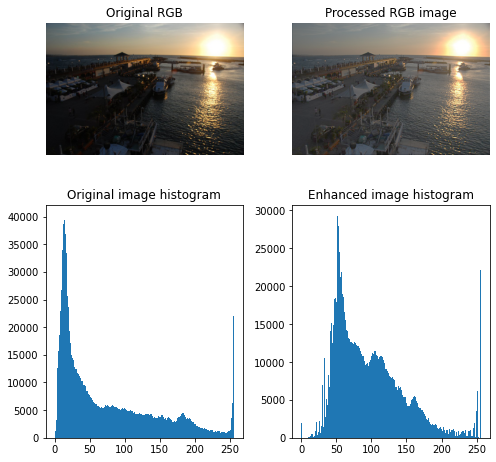

In [6]:
img = cv2.imread('input3.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_sat = LCC_rgb(img_rgb)

f, ax = plt.subplots(2, 2, figsize= (7, 7), tight_layout = True)
ax[0,0].imshow(img_rgb)
ax[0,0].set_title('Original RGB')
ax[0,0].axis('off')
ax[0,1].imshow(img_sat, cmap = 'gray')
ax[0,1].set_title('Processed RGB image')
ax[0,1].axis('off')
ax[1,0].hist(img_rgb.ravel(), 256 , [0,256])
ax[1,0].set_title('Original image histogram')
ax[1,1].hist(img_sat.ravel()*255, 256 , [0,256])
ax[1,1].set_title('Enhanced image histogram')
plt.show()

## 1.c. HSI space

In [7]:
def hsi_to_rgb(img):
    h = img[:,:,0]*360  #recover full angle
    s = img[:,:,1]
    i = img[:,:,2]
    
    h_n = h%120 # instead of subtracting 120 and 240 in each of the 3 cases
    h_n *= np.pi/180.
    e1 = i*(1 - s)
    e2 = i*(1 + s*np.cos(h_n)/np.cos(np.pi/3. - h_n) )
    e3 = 3*i - e1 - e2
    
    r = [[ e2[i,j] if h[i,j]<=120 else e1[i,j] if (h[i,j]>120 and h[i,j]<=240) else e3[i,j] for j in range(h.shape[1])] for i in range(h.shape[0])]
    g = [[ e3[i,j] if h[i,j]<=120 else e2[i,j] if (h[i,j]>120 and h[i,j]<=240) else e1[i,j] for j in range(h.shape[1])] for i in range(h.shape[0])]
    b = [[ e1[i,j] if h[i,j]<=120 else e3[i,j] if (h[i,j]>120 and h[i,j]<=240) else e2[i,j] for j in range(h.shape[1])] for i in range(h.shape[0])]
    #stack them and round to 3 decimal places 
    out = np.stack((r,g,b), 2)
    out[out>1] = 1.
    return out




def LCC_hsi(image):
    
    if np.max(image) > 1.0:
        image = image/255.
        
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    
    #rgb to hsi
    eps = np.finfo(float).eps
    th = np.arccos(np.round(0.5*(2*R - G - B)/ np.sqrt((R-G)**2 + (R-B)*(G-B) + eps), 4))
    H = th
    H[B>G] = 2*np.pi - H[B>G]
   
    H = H/(2*np.pi)
    S = 1 - 3 * np.minimum(R,np.minimum(G,B))/(R+G+B+eps)
    I = (R+G+B)/3.
    
    img_hsi = np.stack((H,S,I), 2)  

    #LCC algorithm
    value = I
    value_fft = np.fft.fft2(value)
    
    M, N = value.shape
    sigma = 4    
    Nr = np.fft.ifftshift(np.arange(np.fix(-M/2.), np.ceil(M/2.), 1))
    Nc = np.fft.ifftshift(np.arange(np.fix(-N/2.), np.ceil(N/2.), 1))
    Nc, Nr  = np.meshgrid(Nc, Nr)
    dft_gauss_kernel = np.exp(-2* sigma**2 * np.pi**2 * ((Nr/M)**2 + (Nc/N)**2))
    
    val_conv_fft = value_fft * np.matlib.repmat(dft_gauss_kernel, 1,1)
    val_M = np.real(np.fft.ifft2(val_conv_fft))
    
    val_out = value**(2**(2*val_M- 1))
    out_hsv = np.stack((H, S, val_out), 2)
    out_rgb = hsi_to_rgb(np.round(out_hsv, 3))

    return img_hsi, out_rgb
    

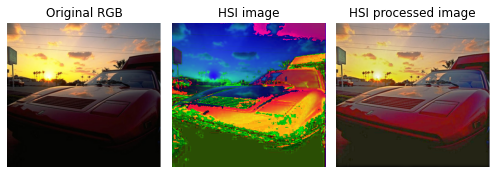

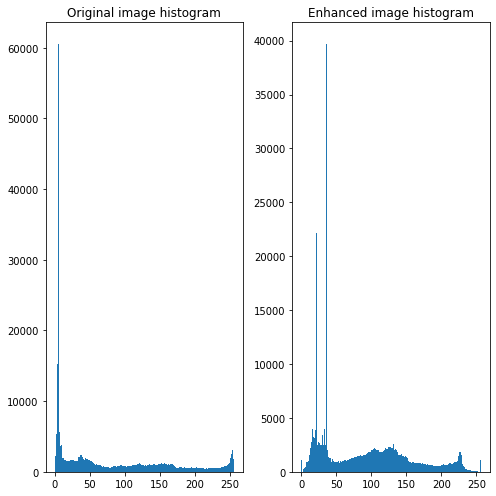

In [8]:
img = cv2.imread('input2.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsi, img_sat = LCC_hsi(img_rgb)

f, ax = plt.subplots(1, 3, figsize= (7, 7), tight_layout = True)
ax[0].imshow(img_rgb)
ax[0].set_title('Original RGB')
ax[0].axis('off')
ax[1].imshow(img_hsi, cmap = 'gray')
ax[1].set_title('HSI image')
ax[1].axis('off')
ax[2].imshow(img_sat, cmap = 'gray')
ax[2].set_title('HSI processed image')
ax[2].axis('off')
plt.show()

f, ax = plt.subplots(1, 2, figsize= (7, 7), tight_layout = True)
ax[0].hist(img_rgb.ravel(), 256 , [0,256])
ax[0].set_title('Original image histogram')
ax[1].hist(img_sat.ravel()*255., 256 , [0,256])
ax[1].set_title('Enhanced image histogram')
plt.show()

## 1.d. HSV space

In [9]:
def LCC_hsv(image):
         
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV_FULL)
    img_hsv = img_hsv/255.
    #LCC algorithm
    value = img_hsv[:,:,2]
    value_fft = np.fft.fft2(value)
    
    M, N = value.shape
    sigma = 4    
    Nr = np.fft.ifftshift(np.arange(np.fix(-M/2.), np.ceil(M/2.), 1))
    Nc = np.fft.ifftshift(np.arange(np.fix(-N/2.), np.ceil(N/2.), 1))
    Nc, Nr  = np.meshgrid(Nc, Nr)
    dft_gauss_kernel = np.exp(-2* sigma**2 * np.pi**2 * ((Nr/M)**2 + (Nc/N)**2))
    
    val_conv_fft = value_fft * np.matlib.repmat(dft_gauss_kernel, 1,1)
    val_M = np.real(np.fft.ifft2(val_conv_fft))
    
    val_out = value**(2**(2*val_M- 1))
    out_hsv = np.stack((img_hsv[:,:,0], img_hsv[:,:,1], val_out), 2)
    out_rgb = cv2.cvtColor((out_hsv*255).astype('uint8'), cv2.COLOR_HSV2RGB_FULL)

    return img_hsv, out_rgb

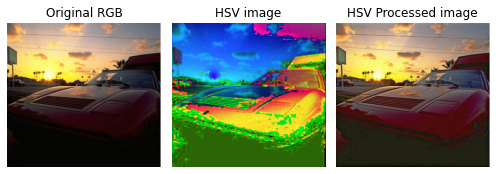

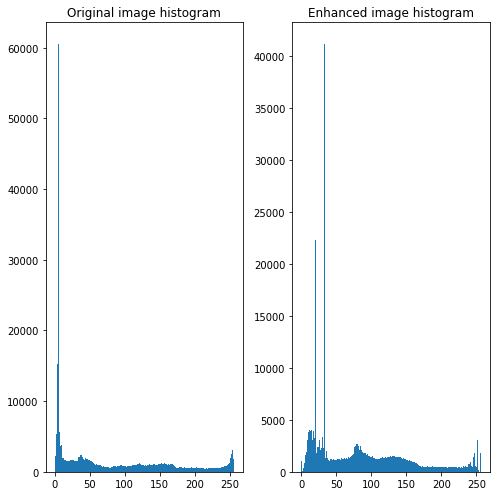

In [10]:
img = cv2.imread('input2.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv, img_sat = LCC_hsv(img_rgb)

f, ax = plt.subplots(1, 3, figsize= (7, 7), tight_layout = True)
ax[0].imshow(img_rgb)
ax[0].set_title('Original RGB')
ax[0].axis('off')
ax[1].imshow(img_hsv, cmap = 'gray')
ax[1].set_title('HSV image')
ax[1].axis('off')
ax[2].imshow(img_sat, cmap = 'gray')
ax[2].set_title('HSV Processed image')
ax[2].axis('off')
plt.show()

f, ax = plt.subplots(1, 2, figsize= (7, 7), tight_layout = True)
ax[0].hist(img_rgb.ravel(), 256 , [0,256])
ax[0].set_title('Original image histogram')
ax[1].hist(img_sat.ravel(), 256 , [0,256])
ax[1].set_title('Enhanced image histogram')
plt.show()

## 1.e. Luminance processing

In [11]:
def LCC_hsl(image):
    
    if np.max(image)>1.:
        image = image/255.
    I = image
    min_val = np.min(image, 2)
    max_val = np.max(image, 2)
    lum = 0.5 * (min_val + max_val)
    
    temp = np.minimum(lum, 1-lum)
    saturation = 0.5*(max_val - min_val)/(temp + np.int_((temp == 0)))   
    sort_img = np.sort(image, 2)
    sort_arg = np.argsort(image, 2)
    i = sort_arg[:,:,2]
    delta = sort_img[:,:,2] - sort_img[:,:, 0]
    delta = delta + np.int_(delta==0)
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    
    hue = np.zeros(R.shape)
    hue[i==0] = (G[i==0] - B[i==0])/delta[i==0]
    hue[i==1] = 2+ (B[i==1] - R[i==1])/delta[i==1]
    hue[i==2] = 4+ (R[i==2] - G[i==2])/delta[i==2]
    
    hue = 60*hue + 360*np.int_(hue<0.)
    #print((delta==0).any())
    hue[delta==0] = float("NaN")
    
    HSL = np.stack((hue, saturation, lum), 2)
    lum_fft = np.fft.fft2(lum)
    
    M, N = lum.shape
    sigma = 4   
    Nr = np.fft.ifftshift(np.arange(np.fix(-M/2.), np.ceil(M/2.), 1))
    Nc = np.fft.ifftshift(np.arange(np.fix(-N/2.), np.ceil(N/2.), 1))
    Nc, Nr  = np.meshgrid(Nc, Nr)
    dft_gauss_kernel = np.exp(-2* sigma**2 * np.pi**2 * ((Nr/M)**2 + (Nc/N)**2))
    
    lum_conv_fft = lum_fft * np.matlib.repmat(dft_gauss_kernel, 1,1)
    lum_M = np.real(np.fft.ifft2(lum_conv_fft))
    lum_out = lum**(2**(2*lum_M- 1))
    output = np.stack((hue, saturation, lum_out), 2)
    
    Delta = lum_out*np.minimum(lum_out, 1-lum_out)
    m0 = lum_out - Delta
    m2 = lum_out + Delta
    tailleN = hue.shape
   
    hue = np.minimum(np.maximum(hue.reshape(-1),0),360)/60
    
    m0 = m0.reshape(-1)
    m2 = m2.reshape(-1)
    F = hue - np.round(hue/2)*2
    Matrice = np.array([m0, m0 + (m2-m0)*np.abs(F), m2]).T
    Num = len(m0)
    
    j = np.array([ [2, 1 ,0], [1, 2, 0], [0, 2, 1], [0, 1 ,2], [1, 0, 2], [2, 0, 1], [2, 1, 0]])*Num
    k = np.int_(np.round(hue)) # +1
    
    Image = np.array( [Matrice.ravel(order='F')[j[k,0]+np.arange(0, Num, 1)], 
                       Matrice.ravel(order='F')[j[k,1]+np.arange(0, Num, 1)], 
                       Matrice.ravel(order='F')[j[k,2]+np.arange(0, Num, 1)] ]
                    ).T.reshape(tailleN[0], tailleN[1], 3)

    return HSL, Image


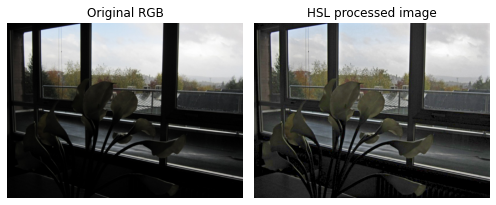

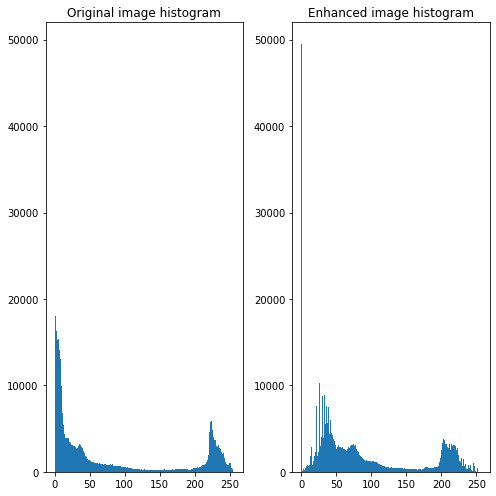

In [12]:
img = cv2.imread('input1.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsl, img_sat = LCC_hsv(img_rgb)

f, ax = plt.subplots(1, 2, figsize= (7, 7), tight_layout = True)
ax[0].imshow(img_rgb)
ax[0].set_title('Original RGB')
ax[0].axis('off')
ax[1].imshow(img_sat, cmap = 'gray')
ax[1].set_title('HSL processed image')
ax[1].axis('off')
plt.show()

f, ax = plt.subplots(1, 2, figsize= (7, 7), tight_layout = True)
ax[0].hist(img_rgb.ravel(), 256 , [0,256])
ax[0].set_title('Original image histogram')
ax[1].hist(img_sat.ravel(), 256 , [0,256])
ax[1].set_title('Enhanced image histogram')
plt.show()

# Simplest Color Balance

In [13]:
def SimplestColorBalance_mono(image, s):
    '''
    image = monochrome input image with size (M, N,1) between 0 and 255
    s     = saturation percentage
    '''
    #image = np.mean(image, 2)    
    img_arr = image.reshape(-1)
    L = len(img_arr)
    sort_arr = np.sort(img_arr)
    
    s2 = s1 = s/2
    v_min_pos = int(L*s1/100.)
    v_max_pos = int(L*(1 - (s2/100)) - 1)
   
    v_min = sort_arr[v_min_pos]
    v_max = sort_arr[v_max_pos]
    
    image[image<v_min] = v_min
    image[image>v_max] = v_max
    image = (image - v_min) * (255. - 0.)/(v_max - v_min + 0)
    
    return np.int_(image)
    

In [14]:
def SimplestColorBalance_rgb(image, s):
    '''
    image = RGB input image with size (M, N,3) between 0 and 255
    s     = saturation percentage
    '''
    
    img_r = image[:,:,0]
    img_g = image[:,:,1]
    img_b = image[:,:,2]
    
    s2 = s1 = s/2
    L = image.shape[0]*image.shape[1]
    v_min_pos = int(L*s1/100.)
    v_max_pos = int(L*(1 - (s2/100)) - 1)
    
    img_r_sort = np.sort(img_r.reshape(-1))
    r_min = img_r_sort[v_min_pos]
    r_max = img_r_sort[v_max_pos]
    img_r[img_r<r_min] = r_min
    img_r[img_r>r_max] = r_max
    img_r = (img_r - r_min) * (255. - 0)/(r_max - r_min + 0)
    
    
    img_g_sort = np.sort(img_g.reshape(-1))
    g_min = img_g_sort[v_min_pos]
    g_max = img_g_sort[v_max_pos]
    img_g[img_g<g_min] = g_min
    img_g[img_g>g_max] = g_max
    img_g = (img_g - g_min) * (255. - 0)/(g_max - g_min + 0)
    
    
    img_b_sort = np.sort(img_b.reshape(-1))
    b_min = img_b_sort[v_min_pos]
    b_max = img_b_sort[v_max_pos]
    img_b[img_b<b_min] = b_min
    img_b[img_b>b_max] = b_max
    img_b = (img_b - b_min) * (255. - 0)/(b_max - b_min + 0)
    
    image_new = np.stack((img_r, img_g, img_b),2)
    return np.int_(image_new)     
    
    
    

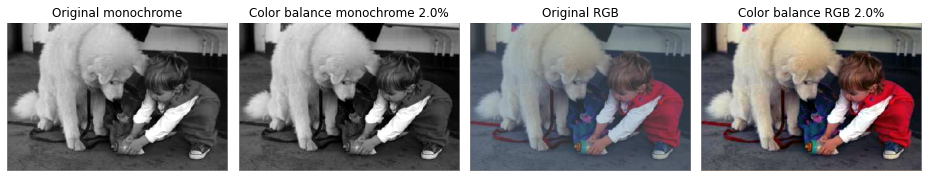

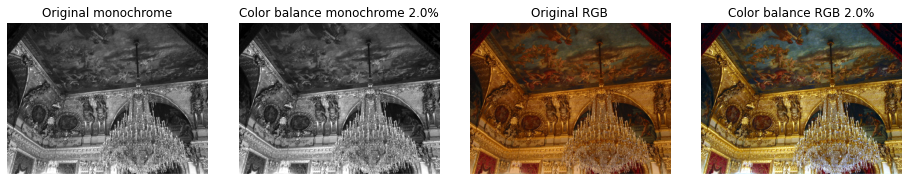

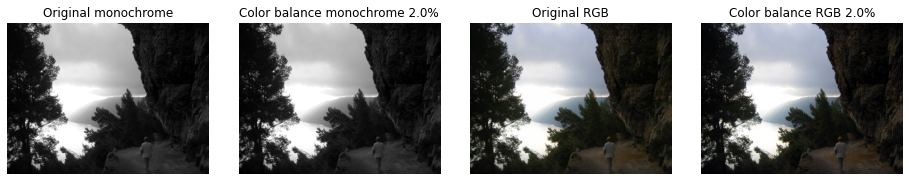

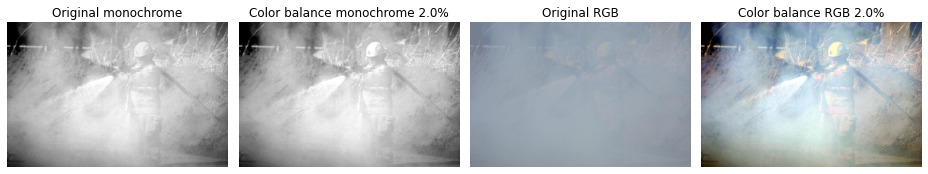

In [15]:
img = cv2.imread('input_0.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
s_level = 2.
img_sat_mono = SimplestColorBalance_mono(img_gray, s_level)
img_sat = SimplestColorBalance_rgb(img_rgb, s_level)
f, ax = plt.subplots(1, 4, figsize= (13,2.5),tight_layout = True)
ax[0].imshow(np.mean(img_rgb,2), cmap='gray')
ax[0].set_title('Original monochrome')
ax[0].axis('off')
ax[1].imshow(img_sat_mono, cmap='gray')
ax[1].set_title('Color balance monochrome '+str(s_level)+ '%')
ax[1].axis('off')
ax[2].imshow(img_rgb)
ax[2].set_title('Original RGB')
ax[2].axis('off')
ax[3].imshow(img_sat)
ax[3].set_title('Color balance RGB '+ str(s_level)+ '%')
ax[3].axis('off')
plt.show()

img = cv2.imread('input_1.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
s_level = 2.
img_sat_mono = SimplestColorBalance_mono(img_gray, s_level)
img_sat = SimplestColorBalance_rgb(img_rgb, s_level)
f, ax = plt.subplots(1, 4, figsize= (13,2.5),tight_layout = True)
ax[0].imshow(np.mean(img_rgb,2), cmap='gray')
ax[0].set_title('Original monochrome')
ax[0].axis('off')
ax[1].imshow(img_sat_mono, cmap='gray')
ax[1].set_title('Color balance monochrome '+str(s_level)+ '%')
ax[1].axis('off')
ax[2].imshow(img_rgb)
ax[2].set_title('Original RGB')
ax[2].axis('off')
ax[3].imshow(img_sat)
ax[3].set_title('Color balance RGB '+ str(s_level)+ '%')
ax[3].axis('off')
plt.show()


img = cv2.imread('input_2.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
s_level = 2.
img_sat_mono = SimplestColorBalance_mono(img_gray, s_level)
img_sat = SimplestColorBalance_rgb(img_rgb, s_level)
f, ax = plt.subplots(1, 4, figsize= (13,2.5),tight_layout = True)
ax[0].imshow(np.mean(img_rgb,2), cmap='gray')
ax[0].set_title('Original monochrome')
ax[0].axis('off')
ax[1].imshow(img_sat_mono, cmap='gray')
ax[1].set_title('Color balance monochrome '+str(s_level)+ '%')
ax[1].axis('off')
ax[2].imshow(img_rgb)
ax[2].set_title('Original RGB')
ax[2].axis('off')
ax[3].imshow(img_sat)
ax[3].set_title('Color balance RGB '+ str(s_level)+ '%')
ax[3].axis('off')
plt.show()

img = cv2.imread('input_3.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
s_level = 2.
img_sat_mono = SimplestColorBalance_mono(img_gray, s_level)
img_sat = SimplestColorBalance_rgb(img_rgb, s_level)
f, ax = plt.subplots(1, 4, figsize= (13,2.5),tight_layout = True)
ax[0].imshow(np.mean(img_rgb,2), cmap='gray')
ax[0].set_title('Original monochrome')
ax[0].axis('off')
ax[1].imshow(img_sat_mono, cmap='gray')
ax[1].set_title('Color balance monochrome '+str(s_level)+ '%')
ax[1].axis('off')
ax[2].imshow(img_rgb)
ax[2].set_title('Original RGB')
ax[2].axis('off')
ax[3].imshow(img_sat)
ax[3].set_title('Color balance RGB '+ str(s_level)+ '%')
ax[3].axis('off')
plt.show()

# Screened Poisson Equation for Image Contrast Enhancement


In [16]:
def periodise(image):
    
    M,N = image.shape[:2]
    img_prd = np.zeros((M*2, N*2))
    img_prd[:M, :N] = image
    img_prd[M:, :N] = image[::-1, :]
    img_prd[:M, N:] = image[:, ::-1]
    img_prd[M:, N:] = image[::-1, ::-1]
    
    return img_prd


def poisson(image, lamda, s):
    
    imgR = image[:,:,0]
    imgG = image[:,:,1]
    imgB = image[:,:,2]
    
    imgR_sat = SimplestColorBalance_mono(imgR, s)
    imgG_sat = SimplestColorBalance_mono(imgG, s)
    imgB_sat = SimplestColorBalance_mono(imgB, s)
    
    imgR_prd = periodise(imgR_sat)
    imgG_prd = periodise(imgG_sat)
    imgB_prd = periodise(imgB_sat)
    image_prd = np.stack((imgR_prd, imgG_prd, imgB_prd), 2) 
    
    imgR_fft = np.fft.fft2(imgR_prd)
    imgG_fft = np.fft.fft2(imgG_prd)
    imgB_fft = np.fft.fft2(imgB_prd)
    
    J, L = imgR_fft.shape
    M = np.tile(np.arange(J).reshape(-1,1), L)
    N = np.tile(np.arange(L).reshape(-1,1), J).T
    fft_u_R = ((2*np.pi*M/J)**2 + (2*np.pi*N/L)**2) * imgR_fft / (lamda + (2*np.pi*M/J)**2 + (2*np.pi*N/L)**2)
    fft_u_G = ((2*np.pi*M/J)**2 + (2*np.pi*N/L)**2) * imgG_fft / (lamda + (2*np.pi*M/J)**2 + (2*np.pi*N/L)**2)
    fft_u_B = ((2*np.pi*M/J)**2 + (2*np.pi*N/L)**2) * imgB_fft / (lamda + (2*np.pi*M/J)**2 + (2*np.pi*N/L)**2)
    
    u_R = np.fft.ifft2(fft_u_R)
    u_G = np.fft.ifft2(fft_u_G)
    u_B = np.fft.ifft2(fft_u_B)
    
    R_sat = SimplestColorBalance_mono(imgR, s)
    G_sat = SimplestColorBalance_mono(imgG, s)
    B_sat = SimplestColorBalance_mono(imgB, s)
    
    image_new = np.stack((R_sat, G_sat, B_sat), 2)
    return np.int_(image_new), np.int_(image_prd)    

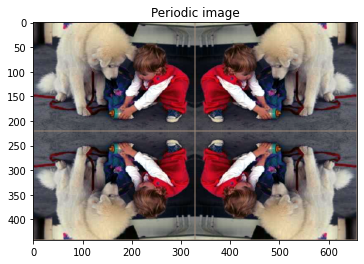

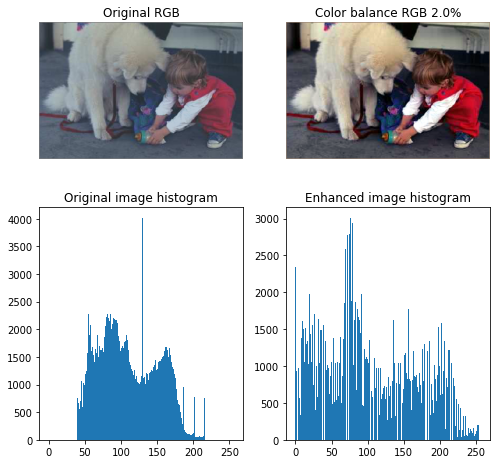

In [17]:
img = cv2.imread('input_0.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
s_level = 2.
lamda = 0.0001

img_sat, img_per = poisson(img_rgb, 0.0001, s_level)

plt.imshow(img_per)
plt.title('Periodic image')
plt.show()

f, ax = plt.subplots(2, 2, figsize= (7, 7), tight_layout = True)
ax[0,0].imshow(img_rgb)
ax[0,0].set_title('Original RGB')
ax[0,0].axis('off')
ax[0,1].imshow(img_sat)
ax[0,1].set_title('Color balance RGB '+ str(s_level)+ '%')
ax[0,1].axis('off')
ax[1,0].hist(img_rgb.ravel(), 256 , [0,256])
ax[1,0].set_title('Original image histogram')
ax[1,1].hist(img_sat.ravel(), 256 , [0,256])
ax[1,1].set_title('Enhanced image histogram')
plt.show()

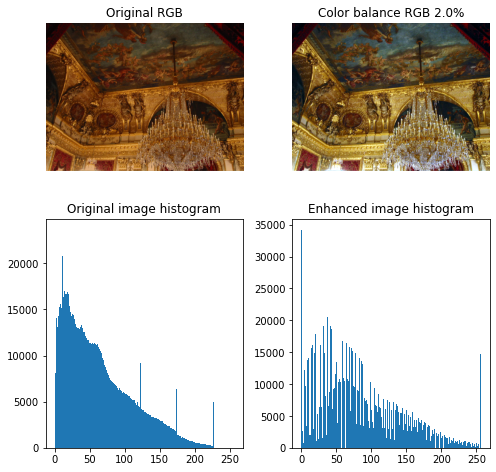

In [18]:
img = cv2.imread('input_1.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
s_level = 2.
lamda = 0.0001

img_sat, img_per = poisson(img_rgb, 0.0001, s_level)

f, ax = plt.subplots(2, 2, figsize= (7, 7), tight_layout = True)
ax[0,0].imshow(img_rgb)
ax[0,0].set_title('Original RGB')
ax[0,0].axis('off')
ax[0,1].imshow(img_sat)
ax[0,1].set_title('Color balance RGB '+ str(s_level)+ '%')
ax[0,1].axis('off')
ax[1,0].hist(img_rgb.ravel(), 256 , [0,256])
ax[1,0].set_title('Original image histogram')
ax[1,1].hist(img_sat.ravel(), 256 , [0,256])
ax[1,1].set_title('Enhanced image histogram')
plt.show()

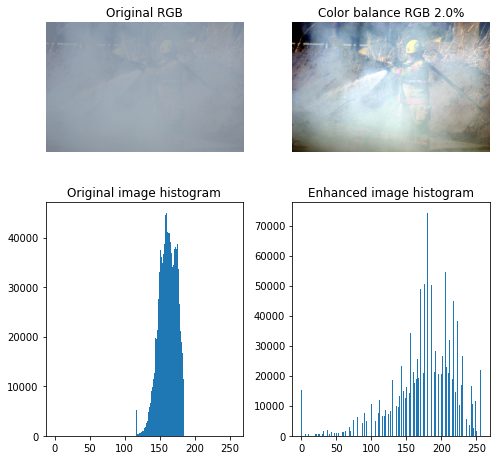

In [19]:
img = cv2.imread('input_3.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
s_level = 2.
lamda = 0.0001

img_sat, img_per = poisson(img_rgb, 0.0001, s_level)

f, ax = plt.subplots(2, 2, figsize= (7, 7), tight_layout = True)
ax[0,0].imshow(img_rgb)
ax[0,0].set_title('Original RGB')
ax[0,0].axis('off')
ax[0,1].imshow(img_sat)
ax[0,1].set_title('Color balance RGB '+ str(s_level)+ '%')
ax[0,1].axis('off')
ax[1,0].hist(img_rgb.ravel(), 256 , [0,256])
ax[1,0].set_title('Original image histogram')
ax[1,1].hist(img_sat.ravel(), 256 , [0,256])
ax[1,1].set_title('Enhanced image histogram')
plt.show()

# Q2) IMAGE DENOISING USING NEW ADAPTIVE BASED MEDIAN FILTER

The following filters are implemented :
- Median Filter
- Adaptive Median Filter
- Decision Based Median Filter
- __New Adaptive Based Median Filter__ ===> Proposed Algorithm in Paper

PSNR Comparison is performed. Best PSNR is obtained for __New Adaptive Based Median Filter__

## Helper Functions

In [2]:
# Function to add Salt Pepper Noise
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


from numba import njit,prange

@njit
def padding(img,pad):

    padded_img = np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad))
    padded_img[pad:-pad,pad:-pad] = img
    return padded_img

# Decision Based Median Filter
@njit
def dbmf(mat,x,y,s,sMax, Zmed_prev):

    window = mat[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    h,w = window.shape
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)
    Zxy = window[h//2,w//2]

    if(Zmin < Zxy < Zmax):
        return Zxy
    elif(Zmin < Zmed < Zmax):
        return Zmed
    else:
         return Zmed_prev

# Adaptive Decision Based Median Filter
@njit
def ada_dbmf(mat,x,y,s,sMax, Zmed_prev):

    window = mat[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    h,w = window.shape
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)
    Zxy = window[h//2,w//2]

    if(Zmin < Zxy < Zmax):
        return Zxy
    elif(Zmin < Zmed < Zmax):
        return Zmed
    else:
        s += 2 
        if s <= sMax:
            return ada_dbmf(mat,x,y,s,sMax, Zmed_prev)
        else:
             return Zmed_prev

# Adaptive Filter            
@njit
def adaptive(mat,x,y,s,sMax, Zmed_prev):

    window = mat[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)

    A1 = Zmed - Zmin
    A2 = Zmed - Zmax

    if A1 > 0 and A2 < 0:
        return Lvl_B(window)
    else:
        s += 2 
        if s <= sMax:
            return adaptive(mat,x,y,s,sMax, Zmed_prev)
        else:
             return Zmed
@njit          
def Lvl_B(window):

    h,w = window.shape
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)

    Zxy = window[h//2,w//2]
    B1 = Zxy - Zmin
    B2 = Zxy - Zmax

    if B1 > 0 and B2 < 0 :
        return Zxy
    else:
        return Zmed

## Reading and adding Salt and Pepper Noise

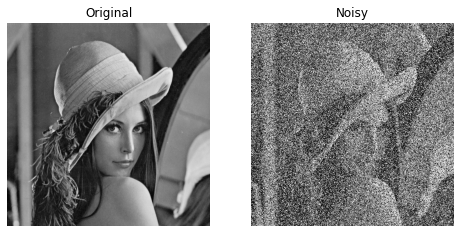

In [3]:
image = cv2.imread('lena.jpg',0) # Only for grayscale image
noisy_image = sp_noise(image,0.25)
im = Image.fromarray(np.uint8(noisy_image))

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image,cmap='gray')
ax1.set_title('Original')
ax2.imshow(noisy_image, cmap='gray')
ax2.set_title('Noisy')

f.set_figheight(8)
f.set_figwidth(8)
ax1.axis('off')
ax2.axis('off')

plt.show()


In [4]:
# Utility Function
@njit(parallel=True)
def filter(filter_type, img, s, sMax):
    H,W = img.shape
    a = sMax//2
    padded_img = padding(img,a)

    f_img = np.zeros(padded_img.shape)
    
    for i in range(a,H+a+1):
        Zmed_prev = 0
        for j in range(a,W+a+1):
            value = filter_type(padded_img,i,j,s,sMax, Zmed_prev)
            Zmed_prev = value
            f_img[i,j] = value

    return f_img[a:-a,a:-a] 

In [5]:
# Filtering
f_median = im.filter(ImageFilter.MedianFilter(size = 3))
f_adaptive = filter(adaptive, noisy_image, s = 3, sMax = 7)
f_dbmf = filter(dbmf, noisy_image, s = 3, sMax = 7)
f_ada_dbmf = filter(ada_dbmf, noisy_image, s = 3, sMax = 7)

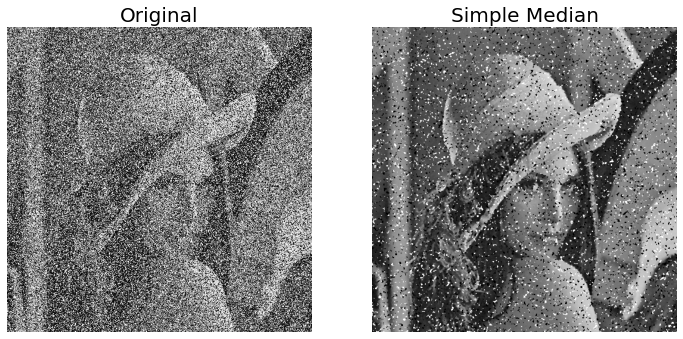

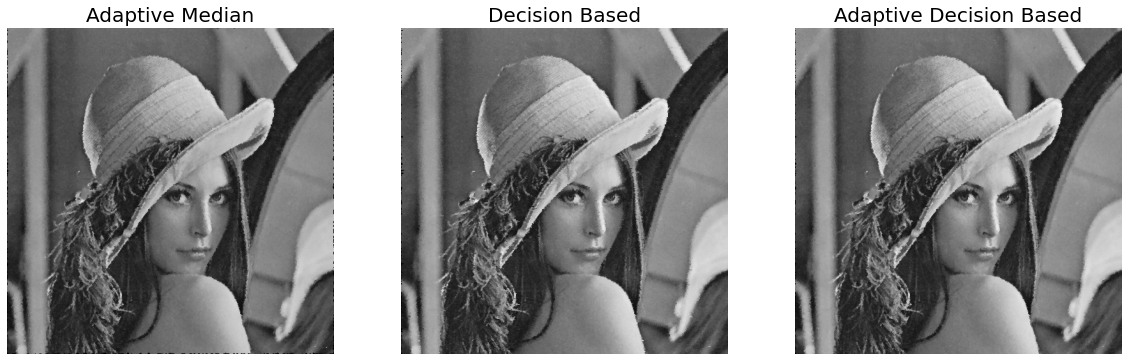

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(noisy_image,cmap='gray')
ax1.set_title('Original', fontsize=20)

ax2.imshow(f_median,cmap='gray')
ax2.set_title('Simple Median', fontsize=20)

f.set_figheight(8)
f.set_figwidth(12)
ax1.axis('off')
ax2.axis('off')
plt.show()

f, (ax3, ax4, ax5) = plt.subplots(1, 3)
ax3.imshow(f_adaptive, cmap='gray')
ax3.set_title('Adaptive Median', fontsize=20)
ax4.imshow(f_dbmf, cmap='gray')
ax4.set_title('Decision Based',fontsize=20)
ax5.imshow(f_ada_dbmf,cmap='gray')
ax5.set_title('Adaptive Decision Based', fontsize=20)

f.set_figheight(6)
f.set_figwidth(20)
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')


plt.show()

## PSNR Comparison for Noise Density of 50%

In [10]:
print("PSNR between original image and Noisy Image :                        ",cv2.PSNR(noisy_image,image))
print("PSNR between original image and Simple Median Filtered Image :       ",cv2.PSNR(np.array(f_median),image))
print("PSNR between original image and Adaptive Median Filtered Image :     ",cv2.PSNR(f_adaptive.astype(np.uint8),image))
print("PSNR between original image and Decision Based Median Filter         ",cv2.PSNR(f_dbmf.astype(np.uint8),image))
print("PSNR between original image and Adaptive Decision Based Median Filter",cv2.PSNR(f_ada_dbmf.astype(np.uint8),image))


PSNR between original image and Noisy Image :                         8.33034132605514
PSNR between original image and Simple Median Filtered Image :        15.12361356650554
PSNR between original image and Adaptive Median Filtered Image :      27.598823287653673
PSNR between original image and Decision Based Median Filter          29.08191055509052
PSNR between original image and Adaptive Decision Based Median Filter 29.42230799287964


### Another Example

In [10]:
image_org = Image.open("mona_noise.jpg")
image = np.array(image_org)

f_median = image_org.filter(ImageFilter.MedianFilter(size = 3))
f_adaptive = filter(adaptive, image, s = 3, sMax = 7)
f_dbmf = filter(dbmf, image, s = 3, sMax = 7)
f_ada_dbmf = filter(ada_dbmf, image, s = 3, sMax = 7)

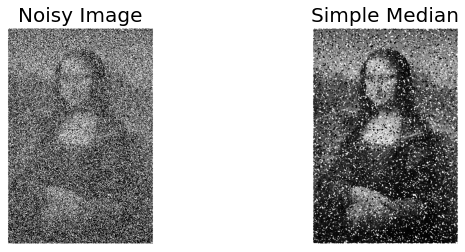

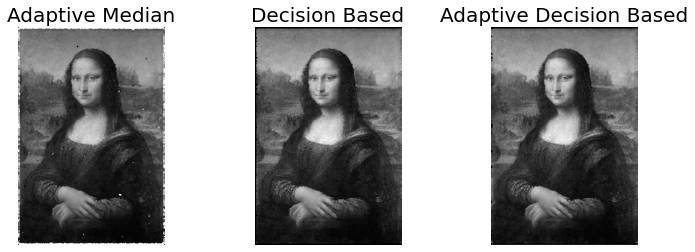

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image,cmap='gray')
ax1.set_title('Noisy Image', fontsize=20)

ax2.imshow(f_median,cmap='gray')
ax2.set_title('Simple Median', fontsize=20)

f.set_figheight(4)
f.set_figwidth(10)
ax1.axis('off')
ax2.axis('off')
plt.show()

f, (ax3, ax4, ax5) = plt.subplots(1, 3)
ax3.imshow(f_adaptive, cmap='gray')
ax3.set_title('Adaptive Median', fontsize=20)
ax4.imshow(f_dbmf, cmap='gray')
ax4.set_title('Decision Based',fontsize=20)
ax5.imshow(f_ada_dbmf,cmap='gray')
ax5.set_title('Adaptive Decision Based', fontsize=20)

f.set_figheight(4)
f.set_figwidth(12)
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')


plt.show()

## Question 3: Research paper - 2 (Fast AHE)

### Original Image

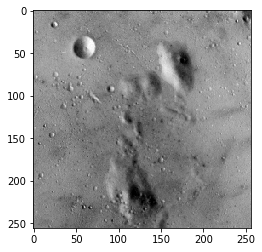

In [2]:
img = plt.imread('moon.tiff')
plt.imshow(img,cmap = 'gray')
plt.show()

### Histogram plot of original image
The plot clearly shows a poor contrast image.

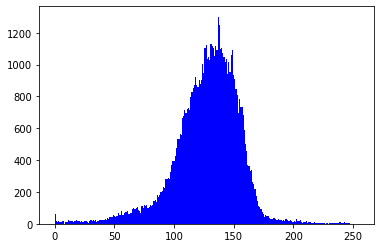

In [3]:
plt.hist(img.ravel(),bins = 2**8,range = (0,255),color = 'blue')
plt.show()

## Traditional Adaptive Histogram Equalisation (AHE)

In [4]:
def traditional_AHE(img,W):
    L = 256
    s = W//2
    img_size = img.shape
    img_mod = np.zeros(img_size)

    img = np.pad(img,(s,s),mode='edge')
    
    for i in range(0,img_size[0]):
        for j in range(0,img_size[1]):
            kernel = img[i:i+W,j:j+W]
            hist = np.zeros(256)   
            for k in range(0,W):
                for l in range(0,W):
                    hist[kernel[k,l]] += 1
            c_sum = sum(hist[0:img[i+s,j+s]])
            img_mod[i,j] = c_sum*L/W**2 
        
    return img_mod

Image size:  (256, 256)
Time taken: 238.674 seconds


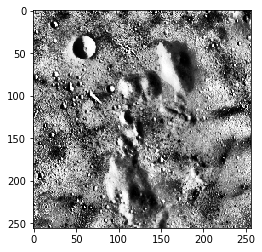

In [5]:
W = 64
print("Image size: ",img.shape)

start = time.time()
img_mod = traditional_AHE(img,W)
stop = time.time()

trad_time = stop-start

print("Time taken: {:.3f} seconds".format(trad_time))

im = np.array(img_mod, dtype = np.uint8)
plt.imshow(im,cmap = 'gray')
plt.show()

### Histogram plot of histogram normalised image
The plot shows the histogram spread across 0 to 255 range.

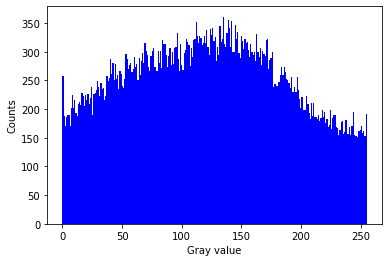

In [6]:
plt.hist(img_mod.ravel(), bins = 2**8, range = (0,255), color = 'blue')
plt.xlabel("Gray value")
plt.ylabel("Counts")
plt.show()

## Fast Adaptive Histogram Equalisation (AHE)

In [7]:
def fast_AHE(img,W):
    s = W//2
    L = 256
    img_size = img.shape
    img = np.pad(img,(s,s),mode='edge')
    
    p = int(np.log2(W**2//L))
    hist = np.zeros(256)   

    for i in range(0,img_size[0]):
        for j in range(0,img_size[1]):
            if(i==0 and j==0):
                kernel = img[0:W,0:W]
                for k in range(0,W):
                    for l in range(0,W):
                        hist[kernel[k,l]] += 1
                if img[0,0] <= L//2:
                    c_sum = sum(hist[0:img[0,0]])
                else:
                    c_sum = W**2 - sum(hist[img[0,0]+1:L-1])

                img_mod[0,0] = int(c_sum)>>p

                f_hist = np.copy(hist)
            else:     

                for k in range(W):
                    hist[img[i+k,j-1]] -= 1
                    hist[img[i+k,j+W]]  += 1
                if img[i+s,j+s] <= L//2:
                    c_sum = sum(hist[0:img[i+s,j+s]])
                else:
                    c_sum = W**2 - sum(hist[img[i+s,j+s]+1:L-1])

                img_mod[i,j] = int(c_sum)>>p       
        if(i==0 and j==0):
                continue
        else:
                for l in range(W):
                        f_hist[img[i, l]] -= 1
                        f_hist[img[i+W, l]] += 1
                hist = np.copy(f_hist)
    
    return img_mod

Image size:  (256, 256)
Time taken: 8.212 seconds


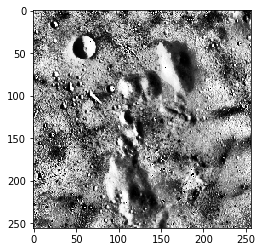

In [8]:
img = cv2.imread('moon.tiff',0)
img_size = img.shape
print("Image size: ",img_size)

W = 64

start = time.time()

img_mod = fast_AHE(img,W)

stop = time.time()

fastAHE_time = stop - start
print("Time taken: {:.3f} seconds".format(fastAHE_time))
im = np.array(img_mod, dtype = np.uint8)
plt.imshow(im,cmap = 'gray')
plt.show()

### Histogram plot of histogram normalised image
The plot shows the histogram spread across 0 to 255 range and has a better normalisation than the traditional algorithm.

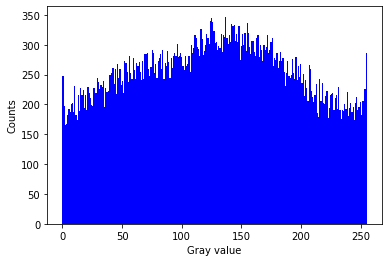

In [9]:
plt.hist(img_mod.ravel(), bins = 2**8, range = (0,255), color = 'blue')
plt.xlabel("Gray value")
plt.ylabel("Counts")
plt.show()

### Computational time comparison

Percentage improvement: 96.559%


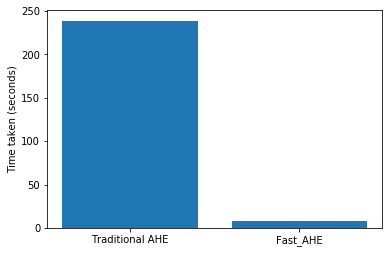

In [10]:
print('Percentage improvement: {:.3f}%'.format((trad_time - fastAHE_time)/trad_time*100))
plt.bar(['Traditional AHE','Fast_AHE'],[trad_time,fastAHE_time])
plt.ylabel('Time taken (seconds)')
plt.show()

## Application on medical images

In [11]:
img = cv2.imread('xray.jfif',0)
img_size = img.shape
print("Image size: ",img_size)
img_mod = np.zeros(img_size)

W = 64

start = time.time()

img_mod = fast_AHE(img,W)

stop = time.time()

fastAHE_time = stop - start
print("Time taken: {:.3f} seconds".format(fastAHE_time))

Image size:  (630, 565)
Time taken: 43.808 seconds


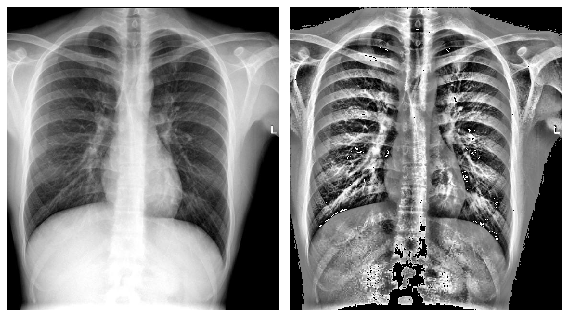

In [12]:
fig, ax = plt.subplots(1,2,figsize = (8,6),tight_layout = True)
ax[0].imshow(img,cmap = 'gray')
im = np.array(img_mod, dtype = np.uint8)
ax[1].imshow(im,cmap = 'gray')
ax[0].axis('off')
ax[1].axis('off')
plt.show()